In [1]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from tensorflow.keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [4]:
true = pd.read_csv("kaggle/input/fake-and-real-news-dataset/True.csv")
false = pd.read_csv("kaggle/input/fake-and-real-news-dataset/Fake.csv")

In [5]:
true['category'] = 1
false['category'] = 0

In [6]:
df = pd.concat([true,false]) #Merging the 2 datasets

In [7]:
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

In [8]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [9]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['text']=df['text'].apply(denoise_text)

In [10]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:5]

['WASHINGTON', '(Reuters)', 'head', 'conservative', 'Republican']

In [11]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 111503,
 'said': 93162,
 'would': 54613,
 'U.S.': 50441,
 'President': 33180,
 'people': 33115,
 'also': 30325,
 'one': 29370,
 'Donald': 27795,
 'said.': 26194}

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(df.text,df.category,random_state = 0)

In [14]:
stopwords = stop

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
# Building a vocabulary of words from the given documents
vocab = {}
for X_train_s in X_train:
    word_list = []
    for word in X_train_s.split():
        word_new  = word.strip(string.punctuation).lower()
        if (len(word_new)>2):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1            

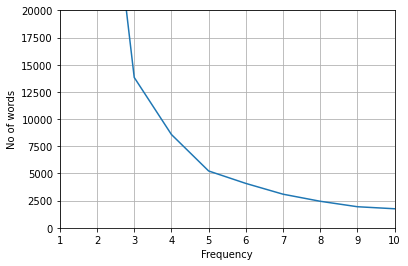

In [17]:
num_words = [0 for i in range(max(vocab.values())+1)] 
freq = [i for i in range(max(vocab.values())+1)] 
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

In [18]:
cutoff_freq = 80
# For deciding cutoff frequency
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)

Number of words with frequency higher than cutoff frequency(80) : 9821


In [19]:
features = []
for key in vocab:
    if vocab[key] >=cutoff_freq:
        features.append(key)

In [20]:
vocab

{'united': 17823,
 'nations': 3554,
 'reuters': 21503,
 'states': 19323,
 'japan': 1635,
 'requested': 619,
 'security': 12061,
 'council': 3090,
 'meet': 2502,
 'wednesday': 7419,
 'discuss': 1788,
 'north': 10164,
 'korea': 6735,
 'latest': 2708,
 'missile': 2468,
 'launch': 871,
 'diplomats': 838,
 'said': 97597,
 'tuesday': 7723,
 'u.n': 3037,
 'sanctions': 3861,
 'since': 10817,
 '2006': 552,
 'ballistic': 828,
 'missiles': 876,
 'nuclear': 5568,
 'programs': 1708,
 'typically': 473,
 'china': 7029,
 'russia': 10063,
 'view': 1881,
 'test': 1424,
 'long-range': 122,
 'weapons': 2840,
 'trigger': 324,
 'possible': 3655,
 'u.s': 38577,
 'requests': 910,
 'fascinating': 42,
 'even': 13413,
 'facts': 1244,
 'related': 1369,
 'flint': 941,
 'water': 2266,
 'crisis': 3282,
 'available': 1141,
 'hollywood': 1236,
 'liberal': 2626,
 'elite': 460,
 'leftist': 1129,
 'across': 3728,
 'america': 9454,
 'calling': 3002,
 'head': 3788,
 'michigan': 1336,
 'republican': 18860,
 'governor': 4052

In [21]:
X_train_dataset = np.zeros((len(X_train),len(features)))
# This can take some time to complete
i=0
for X_train_s in X_train:
    # print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X_train_s.split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1
    i=i+1

In [22]:
# To represent test data as word vector counts
X_test_dataset = np.zeros((len(X_test),len(features)))
# This can take some time to complete
i=0
for X_test_s in X_test:
    # print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X_test_s.split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1
    i=i+1

In [23]:
# Using sklearn's Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Sklearn's score on training data : 0.9646601134440056
Sklearn's score on testing data : 0.962316258351893
Classification report for testing data :-
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5858
           1       0.95      0.97      0.96      5367

    accuracy                           0.96     11225
   macro avg       0.96      0.96      0.96     11225
weighted avg       0.96      0.96      0.96     11225



In [24]:
X_train_dataset.shape

(33673, 9821)

In [25]:
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_test_pred)

0.962316258351893

In [35]:
#y_train_pre = clf.predict(X_train_dataset)
accuracy_score(Y_train, y_train_pre)

0.9476435126065393

In [26]:
cm = metrics.confusion_matrix(Y_test, Y_test_pred)
cm

array([[5592,  266],
       [ 157, 5210]])

In [27]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

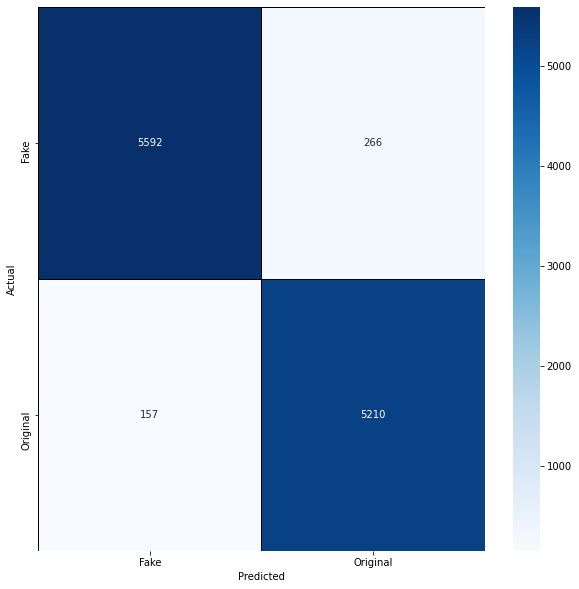

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [29]:
# Using sklearn's Multinomial Naive Bayes
clf =  GaussianNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Sklearn's score on training data : 0.9476435126065393
Sklearn's score on testing data : 0.9371046770601337
Classification report for testing data :-
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5858
           1       0.91      0.97      0.94      5367

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



In [30]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [41]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )

    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

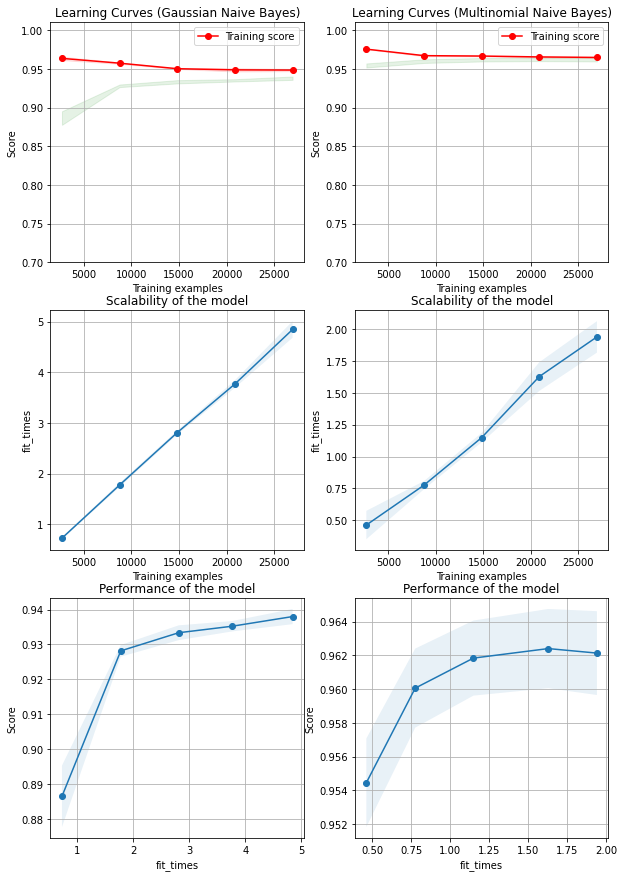

In [42]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (Gaussian Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

estimator = GaussianNB()
plot_learning_curve(
    estimator, title, X_train_dataset,Y_train, axes=axes[:, 0], ylim=(0.7, 1.01), n_jobs=4
)

title = "Learning Curves (Multinomial Naive Bayes)"
# SVC is more expensive so we do a lower number of CV iterations:
estimator = MultinomialNB()
plot_learning_curve(
    estimator, title, X_train_dataset,Y_train, axes=axes[:, 1], ylim=(0.7, 1.01), n_jobs=4
)
plt.show()
